In [3]:
# Shariat and Ahmad Al - Imtiaz; email: ahmadal.imtiaz@gmail.com
# 11 Jan 2023

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as spo

In [9]:
#Data Observer frame
data = pd.read_excel(r"ngc_1068.xlsx")
wave_obs = np.array(data.spectral_axis) #[Angstrom]
flux_den_obs = np.array(data.intensity) #[erg/cm^2/s/A]

In [11]:
#Constants
z = 0.003793
dis_src = 13.48 #Mpc
dis_src = dis_src * 3.08567758*10**24 #[cm]
print(f"Sourced Distance {dis_src} cm")
c = 3*10**8 #[m/s]
f = 3/4
G = 6.6743 * (10**-11) #[Nm^2/kg^2]

Sourced Distance 4.15949337784e+25 cm


In [12]:
#Source frame
wave_src = wave_obs/(1+z) #Angstrom
flux_den_src = flux_den_obs*(1+z) #erg/cm^2/s/A
lum_src = (flux_den_src * 4 * np.pi * dis_src**2) *wave_src #erg/s

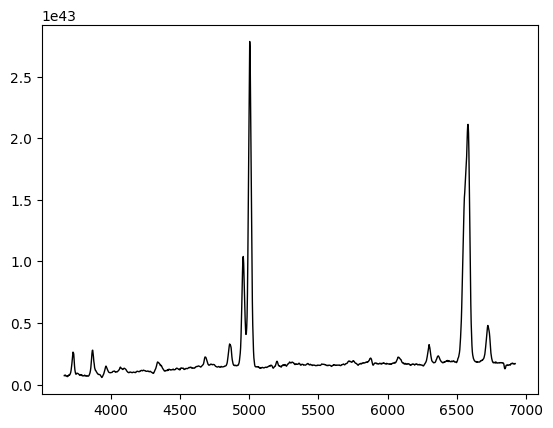

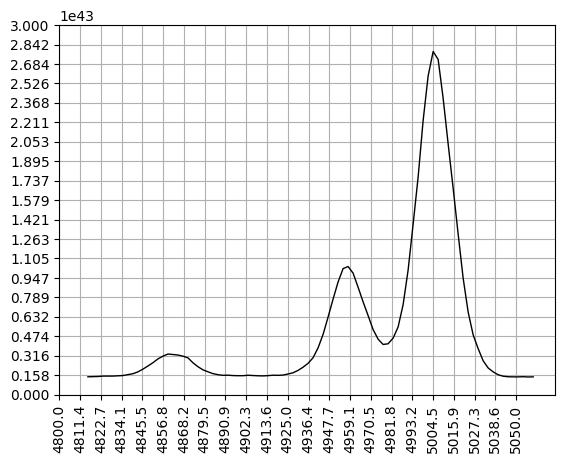

In [13]:
#ploting
plt.plot(wave_src, lum_src, "black", linewidth=1)
plt.show()

plt.plot(wave_src[420:510], lum_src[420:510], "black", linewidth=1)
plt.grid()
plt.xticks(np.linspace(4800,5050, 23), rotation = 90)
plt.yticks(np.linspace(0,3*10**43, 20))
plt.show()

In [14]:
X = wave_src[420:510]
Y = lum_src[420:510]

In [15]:
#defining model

def model(x, amp1, mu1, sig1, c1,
          amp2, mu2, sig2, c2,
          amp3, mu3, sig3, c3,
          amp4, mu4, sig4, c4):
    
    func_val1 = c1 + amp1 * np.exp(-np.power(x - mu1, 2.)/(2 * np.power(sig1, 2.))) #HalphaNarrow
    func_val2 = c2 + amp2 * np.exp(-np.power(x - mu2, 2.)/(2 * np.power(sig2, 2.))) #Halphabroad
    func_val3 = c3 + amp3 * np.exp(-np.power(x - mu3, 2.)/(2 * np.power(sig3, 2.))) #HalphaNarrow
    func_val4 = c4 + amp4 * np.exp(-np.power(x - mu4, 2.)/(2 * np.power(sig4, 2.))) #Halphabroad
    
    return func_val1 + func_val2 +func_val3 +func_val4 - c2 -c3-c4 
    

In [17]:
#curve fitting

def gaussian(x, amp, mu, sig, c):
    func_val = c + amp * np.exp(-np.power(x - mu, 2.)/(2 * np.power(sig, 2.)))
    return func_val

initial_guess = [
                1.4*(10**42), 4863, 7, 0.15*(10**43),  #H [II] Narrow: amp1, mu1, sig1, c1
                0.6*(10**42), 4863, 14, 0.15*(10**43),  #H [II] Broad: amp2, mu2, sig2, c2
                0.6*(10**43), 4957, 6, 0.15*(10**43),  #O [III] Narrow: amp3, mu3, sig3, c3
                0.35*(10**43), 4957, 15, 0.15*(10**43) #O [III] Broad: amp4, mu4, sig4, c4
            ]
bund = (
        (1.3*(10**42), 4860, 6, 0.140*(10**43),  #lower: H [II] Narrow: amp1, mu1, sig1, c1
        0.55*(10**42), 4860, 13, 0.140*(10**43), #lower: H [II] Broad: amp2, mu2, sig2, c2
        0.59*(10**43), 4955, 5, 0.140*(10**43), #Lower: O [III] Narrow: amp3, mu3, sig3, c3
        0.30*(10**43), 4955, 14, 0.140*(10**43) #Lower: O [III] Broad: amp4, mu4, sig4, c4
        ), #All lower in a tuple
        
        (1.6*(10**42), 4866, 8, 0.16*(10**43), #upper: H [II] Narrow: amp1, mu1, sig1, c1
        0.66*(10**42), 4866, 15, 0.16*(10**43),  #upper: H [II] Broad: amp2, mu2, sig2, c2
        0.61*(10**43), 4960, 7, 0.16*(10**43),  #upper: O [III] Narrow: amp3, mu3, sig3, c3
        0.40*(10**43), 4960, 16, 0.16*(10**43)  #upper: O [III] Broad: amp4, mu4, sig4, c4
        ) #All upper in a tuple
        
    )

popt, pcov = spo.curve_fit(model, X, Y, p0 = initial_guess, bounds = bund)
print(popt)
yfit = model(X, *popt)
yfit1 = gaussian(X, *popt[0:4])
yfit2 = gaussian(X, *popt[4:8])
yfit3 = gaussian(X, *popt[8:12])
yfit4 = gaussian(X, *popt[12:16])

[1.40000000e+42 4.86296956e+03 7.02945093e+00 1.50000000e+42
 6.00000000e+41 4.86298970e+03 1.40057063e+01 1.50000000e+42
 6.00000000e+42 4.95765836e+03 6.46317266e+00 1.50000000e+42
 3.50000000e+42 4.95854800e+03 1.59950000e+01 1.50000000e+42]


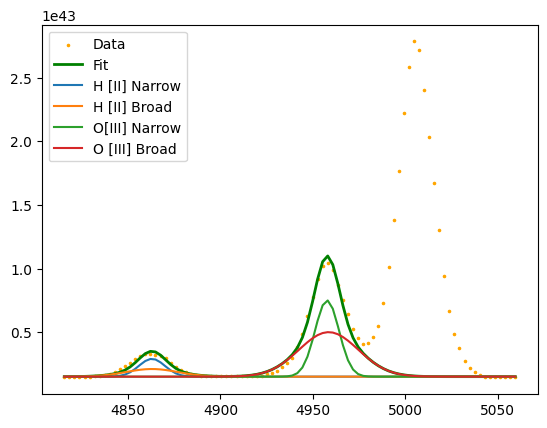

In [18]:
plt.scatter(X, Y, s=10, c='Orange', marker=".", label = "Data")
plt.plot(X, yfit, "green", linewidth=2, label = "Fit")
plt.plot(X, yfit1, label = "H [II] Narrow")
plt.plot(X, yfit2, label = "H [II] Broad")
plt.plot(X, yfit3, label = "O[III] Narrow")
plt.plot(X, yfit4, label = "O [III] Broad")
plt.legend()
plt.show()

In [19]:
#Finding values
lum_5100 = gaussian(5100, *popt[8:12]) #erg/s
print("O[III](5100)",lum_5100)
FWHM = 2.3548*popt[6] #need to correct for func2 
print("FWHM1",FWHM)
V = (c*FWHM)/4863 #m/s
R = 2.59* 10**13 * 10**(1.527 + (0.533*np.log10((lum_5100/(10**44))))) #m


M_BH = f * ((R*V**2)/G) #kg
M_BH = (M_BH/(1.989*10**30)) #Solar mass
Error = (7*10**7-M_BH)
print("Mass of BH:",M_BH)
print("Error:", Error)

O[III](5100) 1.4999999999999998e+42
FWHM1 32.98063720750419
Mass of BH: 2173347.7234261744
Error: 67826652.27657382
